# Homework 1: Classification [25 pts]
## Comp562 Summer II 2023

### Due 11:59pm July 3, 2023

In this assignment, you will use the classification algorithms discussed in class and experiment with some toy data. To avoid unexpected behavior with cached variables, test your code with a fresh kernel. For convenience, you may use scipy for math operations and optimization (these functions have been imported in the boilerplate).

Scipy can be installed via pip: `pip install scipy`

### Problem 0: Load data [0 pts]
Run the provided code segments and confirm that you are able to load the data correctly. You should see 2 classes in the training data and no distinct classes in the testing data.

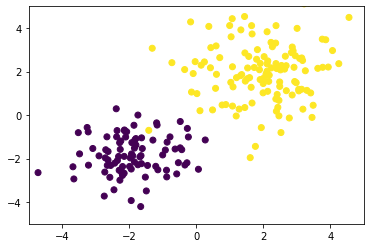

In [4]:
import numpy as np  # numerical operations
import matplotlib.pyplot as plt  # visualization

fn = "hw1_train_data.csv"
train_data = np.genfromtxt(fn, delimiter=',')
train_samples = train_data[:,:-1]
train_labels = train_data[:,-1]   # labels in the last column
colors = plt.cm.viridis(train_labels/np.amax(train_labels))

plt.scatter(train_samples[:,0], train_samples[:,1] ,c=colors)
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.show()

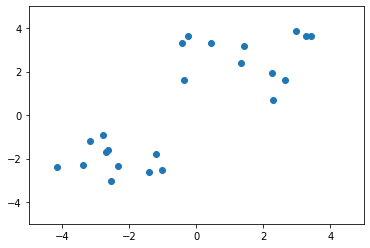

In [12]:
fn = "hw1_test_data.csv"
test_data = np.genfromtxt(fn, delimiter=',')
plt.scatter(test_data[:,0], test_data[:,1])
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.show()

### Problem 1: Decision tree [3 pts]
**(1a)** Imagine we want to construct a decision tree using the training data provided. Describe in words how to determine a good split point. [1 pt]

To determine good split points we want to select points that seperate the data into diffenrent classes. We would base these split point on features. 

**(1b)** What is the effect of increasing the depth of a decision tree? What happens if the depth is increased excessively? [2 pt]

Increasing the depth of a decision tree creates a more complex model. A deeper tree can show more specific patterns in features thus making more nuanced classification decisons. If the depth is increased excessively in a decision tree this can lead to overfitting. 

### Problem 2: Naive Bayes [2 pts]
**(2a)** What assumptions does the Naive Bayes algorithm make about the features of the data? [2 pts]

Naive Bayes Algorithm Asumptions:
- Features are independent
- Each feature has equal weight
- Distribution of features is normal

### Problem 3: Nearest neighbors [6 pts]

**(3a)** Classify each point in the test set using the nearest neighbors algorithm with $k=5$. [4 pts]

/var/folders/jn/q0hd50fx5wq91y8bvjtcfpcm0000gn/T/ipykernel_85681/4144423605.py:18: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label = mode(train_labels[np.argsort(get_distance(pt, train_samples))[:k]])[0]


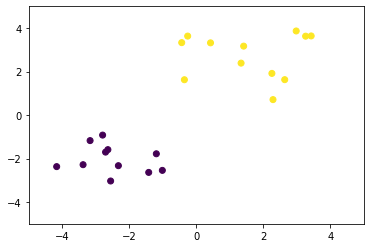

In [47]:
def get_distance(pt, pcd):
    '''
    Distance between a point and every point in a given point cloud.
    
    Input: pt   -   numpy array (2,)
           pcd  -   numpy array (n, 2)
           
    Output: distances - numpy array (n,)
    '''
    return np.sqrt(np.sum(np.square(pcd - pt), axis=1))

from scipy.stats import mode
test_labels = []
k = 5
for pt in test_data:
    #TODO: replace placeholder variables
    #Gets indices of the k smallest values
    label = mode(train_labels[np.argsort(get_distance(pt, train_samples))[:k]])[0]
    test_labels.append(label)
    
    #Mode gives a warning message not sure if I should replace it?
    
colors = plt.cm.viridis(test_labels/np.amax(train_labels))
plt.scatter(test_data[:,0], test_data[:,1] ,c=colors)
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.show()

**(3b)** Now suppose our training data has severely unbalanced classes (i.e. one class has significantly more samples than the other). Describe in words how you would adjust your implementation of this algorithm and why. [2 pts]

Two options I would consider.
- I would adjust my algorithm by increasing the size of k. If you increase the size of k (nearest neighbors) this could reduce the impact of misslabeld samples. 

- I could instead assign weights to samples based on class, classes with smaller samples could have higher weights.  This could give more importance to smaller sample classes.

### Problem 4: Support Vector Machine [14 pts]

For this problem, we will parameterize the separating hyperplane by a point on the hyperplane $b$ and a direction orthogonal to the hyperplane (the separating direction $w$). We can then project any point in the dataset $x$ onto the separating direction using the inner product $w^T x$ and determine its estimated class label based on the sign of the distance between this projection and the projection of point $b$ onto $w$, sign($w^Tb - w^Tx$).

In the visualization boilerplate code provided, the separating hyperplane defined by $b$ and $w$ is drawn in red. The orthogonal direction $w$ is not drawn.

**(4a)** Use an optimization to compute the best separating hyperplane given the training data. [6 pts]

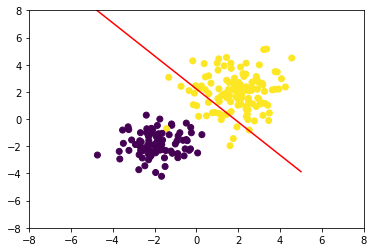

In [48]:
from scipy.optimize import minimize

#sum of losses over the training data
def sum_losses(w):
    return sum(max(0, -y * (X @ w)) for y, X in zip(train_labels, train_samples))

#this function enforces constraints
def cons(w):
    return w @ w - 1

#optimization result
optimization = minimize(sum_losses, w, constraints=[{'type': 'eq', 'fun': cons}])

#TODO: replace placeholder variables
b = np.array([1,1])
w = optimization.x

#plotting all the information
m = -w[0]/w[1]
sep_x = [-5,5]
sep_y = [m*(x-b[0])+b[1] for x in sep_x]
colors = plt.cm.viridis(train_labels/np.amax(train_labels))
plt.scatter(train_samples[:,0], train_samples[:,1] ,c=colors)
plt.plot(sep_x,sep_y,c='red')
plt.xlim([-8,8])
plt.ylim([-8,8])
plt.show()

**(4b)** Using the hyperplane computed in part (a), classify each point in the test set. [2 pts]

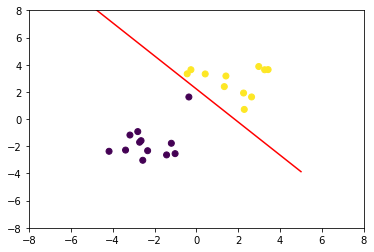

In [49]:
test_labels = []

for pt in test_data:
    #calculate pt on w using dot product
    pt_on_w = w @ pt
    #calculate b on w using dot product
    b_on_w = w @ b
    label = 1 if pt_on_w >= b_on_w else -1          
    test_labels.append(label)
    
colors = plt.cm.viridis(test_labels/np.amax(train_labels))
plt.scatter(test_data[:,0], test_data[:,1] ,c=colors)
plt.plot(sep_x,sep_y,c='red')
plt.xlim([-8,8])
plt.ylim([-8,8])
plt.show()

**(4c)** What is the difference between soft and hard margin SVM? [1 pt]

The main difference between soft and hard margin SVM is that soft margin SVM allows for missclassfied points. These misclassfied points recieve a penalty in the form of a slack variable (zero for correctly classfied points - farther from zero for missclassfied points). Hard margin SVM "completely" sepereates classes and doesn't allow any missclassfication (assumes data is linear separable). 

**(4d)** What are the advantages and disadvantages of using distance weighted discrimination vs. SVM? [2 pts]

Advantages of DWD over SVM
- Performs better than SVM for high dimension, low sample size problems
- More robust because it uses all data points instead of just support vectors
- Can handle non-linearly separable data without having to transform
- Simplier implementation

Disadvantages of DVD over SVM
- No kernel trick 
- Sensitve to outliers in high dimensional spaces

**(4e)** Now load the second train/test dataset in files `hw1_train_data_2.csv` and `hw1_test_data_2.csv`. Describe in words how you would use SVM to compute a separating hyperplane. [3 pts]

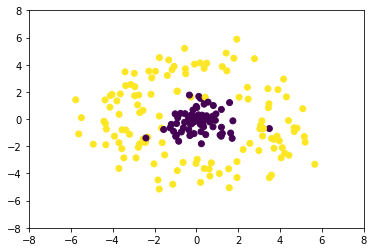

In [24]:
train_fn = "hw1_train_data_2.csv"
test_fn = "hw1_test_data_2.csv"

# TODO: load and visualize data
# Used code from Problem 0 and replaced the CSV files
train_data = np.genfromtxt(train_fn, delimiter=',')
train_samples = train_data[:,:-1]
train_labels = train_data[:,-1]   # labels in the last column
colors = plt.cm.viridis(train_labels/np.amax(train_labels))

plt.scatter(train_samples[:,0], train_samples[:,1] ,c=colors)
plt.xlim([-8,8])
plt.ylim([-8,8])
plt.show()

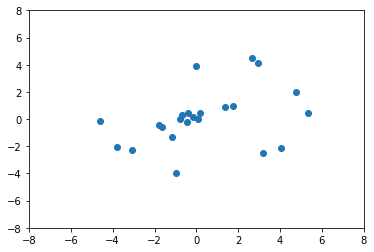

In [13]:
# Used code from Problem 0 and replaced the CSV files
test_data = np.genfromtxt(test_fn, delimiter=',')
plt.scatter(test_data[:,0], test_data[:,1])
plt.xlim([-8,8])
plt.ylim([-8,8])
plt.show()

Your solution here.

From the above visualization of the data we see that the data is non-linearly seperable. We would use the Kernel Trick to compute a spereating hyperplane. We need to apply the kernel trick to SVM. The kernel trick transforms the data into a higher dimension. The kernel function is applied and returns a dot product (inner product) of the transformed vectors in the higher dimension space without transforming the space.

The adjustments that would be made in SVM mathematically (as discussed in lecture)
- You substitibute z for xi
- Define the kernel as function of x and x' 
- In our calcualation of lamda (zi,zj) function becomes K(xi,xj)
- in our original becomes K(zi,zj)

